In [12]:
# Question 1
# Approzimate sin(x) with x

relative_error = 5e-15

x = sqrt(3)*1e-7

# x = sqrt(6 / ((1e14 / 3) + 1))
# println(x)

approx1 = x + (-1/6) * x^3
approx2 = x + (-1/6) * x^3 + (1/120) * x^5
approx3 = x + (-1/6) * x^3 + (1/120) * x^5 - (1/5040) * x^7

println(approx1)
println(approx2)
println(approx3)

println(abs(approx1 - x) / sin(x))
println(abs(approx2 - x) / sin(x))
println(abs(approx3 - x) / sin(x))

println(abs(sin(x) - x) / sin(x))

1.7320508075688685e-7
1.7320508075688685e-7
1.7320508075688685e-7
5.043170344881847e-15
5.043170344881847e-15
5.043170344881847e-15
5.043170344881847e-15


In [19]:
# Question 3
# Approximate e ^ x with truncated Maclaurin series
# If x = 0.5, how many terms for absolute accuracy of at least 1e-10 ?

x = 0.5

abs_error(n) = (exp(x) * (x ^ (n + 1))) / factorial(n + 1)

for i in 0:15

    error_i = abs_error(i)
    println("n: ", i , " error: ", error_i)

    if error_i < 1e-10
        println("Number of terms for e-10 accuracy: ", i)
        break
    end

end

n: 0 error: 0.8243606353500641
n: 1 error: 0.20609015883751602
n: 2 error: 0.03434835980625267
n: 3 error: 0.004293544975781584
n: 4 error: 0.0004293544975781584
n: 5 error: 3.577954146484653e-5
n: 6 error: 2.5556815332033237e-6
n: 7 error: 1.5973009582520773e-7
n: 8 error: 8.87389421251154e-9
n: 9 error: 4.4369471062557704e-10
n: 10 error: 2.0167941392071684e-11
Number of terms for e-10 accuracy: 10


In [2]:
# Question 4

f(x) = 1 - x ^ 2
e() = 1 + eps()

a = sqrt(eps() / (1 + eps()))
println(a)
println(f(a))
println(BigFloat(f(a)))
println(f(a) * e())
println(BigFloat(f(a) * e()))

println()

a = sqrt((2 * eps() + eps() ^ 2) / (1 + 2 * eps() + eps() ^ 2))
println(a)
println(f(a))
println(BigFloat(f(a)))
println(f(a) * e() ^ 2)
println(BigFloat(f(a) * e() ^ 2))

println()

a = sqrt((eps() + 0.25 * eps() ^ 2) / (1 + eps() + 0.25 * eps() ^ 2))
println(a)
println(f(a))
println(BigFloat(f(a)))
println(f(a) * (1 + eps() / 2) ^ 2)
println(BigFloat(f(a) * (1 + eps() / 2) ^ 2))

1.4901161193847655e-8
0.9999999999999998


0.9999999999999997779553950749686919152736663818359375
1.0
1.0

2.107342425544701e-8
0.9999999999999996
0.999999999999999555910790149937383830547332763671875
1.0
1.0

1.4901161193847655e-8
0.9999999999999998
0.9999999999999997779553950749686919152736663818359375
0.9999999999999998
0.9999999999999997779553950749686919152736663818359375


In [13]:
# Question 5

t = 4

# a) (a + b) + c

a = 0.0002
b = 4000
c = -4000
println(round(round(a + b, sigdigits = t) + c, sigdigits = t))
println(round(a + round(b + c, sigdigits = t), sigdigits = t))

println()

# b) a + (b + c)

a = 1.234
b = 2.003
c = 3.456
println(round(round(a * b, sigdigits = t) * c, sigdigits = t))
println(round(a * round(b * c, sigdigits = t), sigdigits = t))

0.0
0.0002

8.543
8.542


In [14]:
# Question 6b (spacing.jl)

a = 1
b = 10
n = 10000

function x_tilde(a, b, n)
    h = (b - a) / n
    x_tilde_list = []
    x_tilde_i = a
    push!(x_tilde_list, x_tilde_i)

    for i in 1:n
        x_tilde_i = x_tilde_i + h
        push!(x_tilde_list, x_tilde_i)
    end

    return x_tilde_list
end

function x_hat(a, b, n)
    h = (b - a) / n
    return [a + i * h for i in 0:n]
end

function x_acc(a, b, n)
    h = BigFloat((b - a) / n)
    return [BigFloat(a + i * h) for i in 0:n]
end

using Plots

x_tilde_err = abs.(x_acc(a, b, n) .- x_tilde(a, b, n))
x_hat_err = abs.(x_acc(a, b, n) .- x_hat(a, b, n))

# Unable to use log scale (some errors are 0)
s = plot([0:n], x_tilde_err, label="x_tilde error", color=:blue)
plot!([0:n], x_hat_err, label="x_hat error", color=:red)
xaxis!("\$x_i\$")
yaxis!("Abs. Value of Error")
savefig(s, "spacing.png")

"/Users/cameron.beneteau/MECHTRON-3X03-Scientific-Computation/assignments/assignment-1/spacing.png"

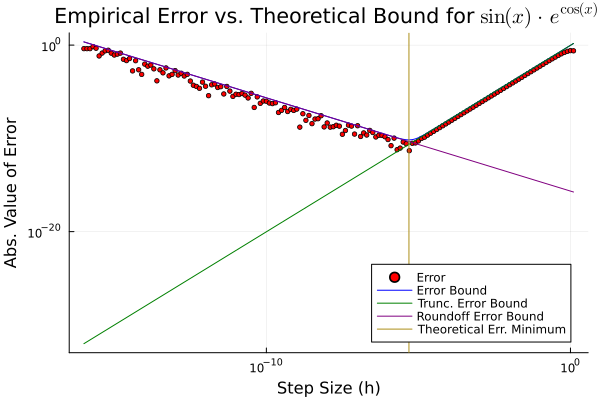

In [29]:
# Question 7c

using Plots

x = π / 4
h = 10 .^ (-16:0.1:0.1)
M = 5.724

f(x) = sin.(x) .* exp.(cos.(x))
fp_accurate = exp.(cos.(x)) * cos.(x) - exp.(cos.(x)) * sin.(x) .^ 2
fp = (f(x .+ h) .- f(x .- h)) ./ (2 .* h)

error = abs.(fp_accurate .- fp)
truncation(h) = M .* h .^ 2 ./ 6
roundoff(h) = eps() ./ h
err_bound(h) = truncation(h) + roundoff(h)
error_bound = err_bound(h);

t = scatter(h, error, color=:red, label="Error", xaxis=:log, yaxis=:log, markersize=2.5, legend=:bottomright)
plot!(h, error_bound, color=:blue, label="Error Bound", xaxis=:log, yaxis=:log)
plot!(h, truncation(h), color=:green, label="Trunc. Error Bound", xaxis=:log, yaxis=:log)
plot!(h, roundoff(h), color=:purple, label="Roundoff Error Bound", xaxis=:log, yaxis=:log)
xaxis!("Step Size (h)")
yaxis!("Abs. Value of Error")
title!("Empirical Error vs. Theoretical Bound for \$\\sin(x) \\cdot e^{\\cos(x)}\$")
vline!([cbrt(3 * eps() / M)], label="Theoretical Err. Minimum")
# savefig(t, "truncation.png")

In [33]:
# Queston 8b

using Plots

function expm1mx(x)

    approx = 0.5
    term = approx

    # 18 terms, anything more is negligible 
    for n in 3:20
        term *= x / n
        approx += term
    end

    return approx
end

# Define our function and domain
f(x) = (exp(x) - 1 - x) / x ^ 2
N = -16:1:0
x = 10. .^ N

# Compute accurate values in higher precision
accurate = f.(BigFloat.(x))

# Relative error in f(x)
error_f = abs.((f.(x) - accurate) ./ accurate)

# Relative error in expm1mx(x)
error_app = abs.((expm1mx.(x) - accurate) ./ accurate)

# Plot and save the output
p = plot(x, error_f, xaxis=:log, yaxis=:log,
label="Rel. Error in f(x)", color=:blue)
plot!(x, error_app, xaxis=:log, yaxis=:log,
label="Rel. Error in expm1mx(x)", color=:red)
xaxis!("x")
yaxis!("Relative Error")
# savefig(p, "relative_error.png")

"/Users/cameron.beneteau/MECHTRON-3X03-Scientific-Computation/assignments/assignment-1/relative_error.png"

In [9]:
g(x) = (exp(x)-1-x)/x^2;
h(x) = (exp(x)-x-1)/x^2;
x = 1e-10;

println("g(x)")
println(exp(x))
println(exp(x) - 1)
println(exp(x) - 1 - x)

println("h(x)")
println(exp(x))
println(exp(x) - x)
println(exp(x) - x - 1)

println("x=$(x)")
println("g(x)=$(g(x))")
println("h(x)=$(h(x))")
x = 2^(-33);

println("g(x)")
println(exp(x))
println(exp(x) - 1)
println(exp(x) - 1 - x)

println("h(x)")
println(exp(x))
println(exp(x) - x)
println(exp(x) - x - 1)

println("x=$(x)")
println("g(x)=$(g(x))")
println("h(x)=$(h(x))")

g(x)
1.0000000001
1.000000082740371e-10
8.274037096265818e-18
h(x)
1.0000000001
1.0
0.0
x=1.0e-10
g(x)=827.4037096265816
h(x)=0.0
g(x)
1.0000000001164153
1.1641532182693481e-10
0.0
h(x)
1.0000000001164153
1.0
0.0
x=1.1641532182693481e-10
g(x)=0.0
h(x)=0.0


In [5]:
0.0000000001 / (1.0e-10 ^ 2)

1.0e10